In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import plotly.express as px
import math 
from datetime import datetime

In [7]:
df = pd.read_csv('data.csv')
df

,Position,Track Name,Artist,Streams,URL,Date,Region
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ec
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,ec
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,ec
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,ec
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,ec
...,...,...,...,...,...,...,...
3441192,196,More Than You Know,Axwell /\ Ingrosso,2126,https://open.spotify.com/track/71bBFbfn2OBK5Qw...,2018-01-09,hk
3441193,197,Issues,Julia Michaels,2117,https://open.spotify.com/track/7vu0JkJh0ldukEY...,2018-01-09,hk
3441194,198,Tuo Fei Lun,Eason Chan,2112,https://open.spotify.com/track/0pmGleExiQyd0Hx...,2018-01-09,hk
3441195,199,面具,Alfred Hui,2102,https://open.spotify.com/track/58SUsgamkW6vFFq...,2018-01-09,hk


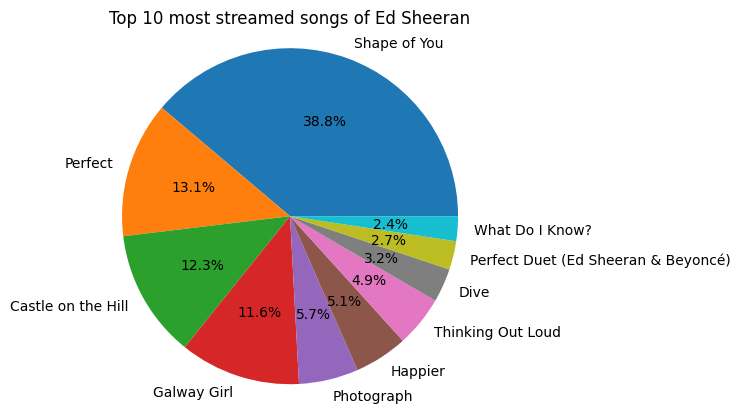

In [8]:
ed_sheeran_df = df[df['Artist'] == 'Ed Sheeran']
grouped_df = ed_sheeran_df.groupby(['Track Name']).sum(numeric_only=True)[['Streams']]
top10_df = grouped_df.sort_values(by='Streams', ascending=False).head(10)

labels = top10_df.index.tolist()
sizes = top10_df['Streams'].tolist()

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Top 10 most streamed songs of Ed Sheeran')
plt.show()

<h3> Trường dữ liệu </h3>
<ul>
    <li>Artist</li>
    <li>Track Name</li>
    </li>Streams</li>
</ul>
<h3> Xử lý dữ liệu </h3>
<ul>
    <li>Lọc ra các bài hát của Ed Sheeran</li>
    <li>Đếm số lượt phát của mỗi bài hát </li>
    <li>Lấy ra 10 bài nhiều lượt nghe nhất</li>
</ul>

<h3> Phân tích, khám phá </h3>

- Biểu đồ tròn trên thể hiện tỉ lệ phần trăm lượt nghe 10 bài hát được nghe nhiều nhất của Ed Sheeran (Người có nhiều lượt nghe nhất trong dataset)
- Bài hát "Shape of you" là bài hát được nghe nhiều nhất và chiếm tỉ lệ khá cao (40%), 3 bài hát kế tiếp gồm "Perfect", "Castle On Hill" và "Galway Girl" cũng chiếm tỉ lệ ngang nhau khoảng hơn 10% với mỗi bài hát, Các bài hát còn lại chiếm tỉ lệ khá thấp
- Ta có thấy là người có nhiều lượt nghe nhất tuy nhiên lượt nghe của Ed Sheeran chủ yếu đến từ 4 ca khúc "Shape of you", "Perfect", "Castle On Hill" và "Galway Girl" trong đó ca khúc "Shape Of you" chiếm phần lớn lượt nghe
<h3> Lý do chọn pie chart( biểu đồ tròn) </h3>
<ul>
  <li>Biểu đồ tròn là một công cụ hữu ích để thể hiện tỷ lệ phần trăm của một loạt các mục khác nhau trong một trường dữ liệu. </li>
  <li>Cho thấy tỉ lệ phần trăm lượt nghe của mỗi bài hát so với tổng lượt nghe của 10 bài hát</li>
  <li>Giúp cho người đọc có thể dễ dàng so sánh tỷ lệ phần trăm của các sơ đồ khác nhau </li>
  <li>Giúp cho các thông tin trở nên trực quan và dễ hiểu hơn so với việc đọc các con số trong một bảng dữ liệu</li>
</ul>

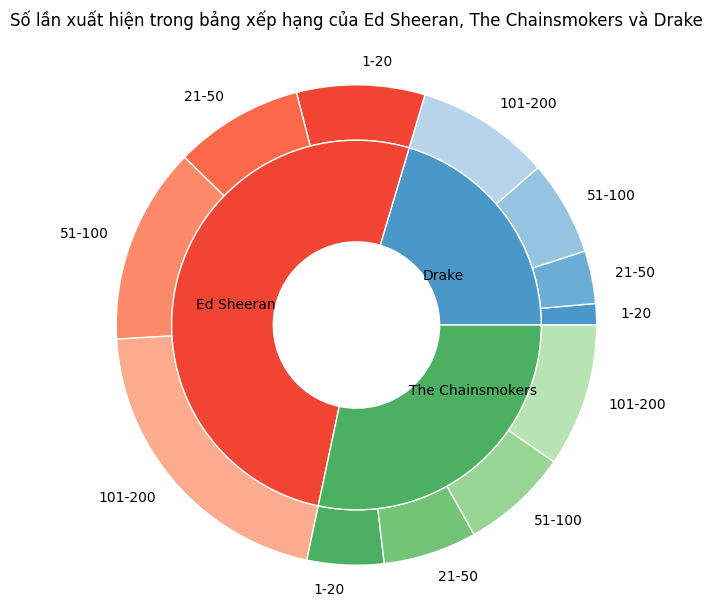

In [9]:
# Lọc ra các dòng có Artist là "Ed Sheeran" hoặc "The Chainsmokers", và Position nằm trong các khoảng 1 đến 10, 10 đến 50, 50 đến 100 và 100 đến 200
df_filtered = df[(df['Artist'].isin(['Ed Sheeran', 'The Chainsmokers','Drake'])) ]

# Group theo Artist và Position để đếm số lần xuất hiện của từng cặp Artist và Position
df_count = df_filtered.groupby(['Artist', pd.cut(df_filtered['Position'], bins=[1, 20, 50, 100, 200], labels=['1-20', '21-50', '51-100', '101-200'])])['Position'].count().reset_index(name='Count')
# Tính tổng lần xuất hiện
df_sum = df_count.groupby('Artist')['Count'].sum().reset_index(name='Total Count')

# Tạo nested pie chart
fig, ax = plt.subplots(figsize=(15,6))
#Create Color
a, b, c=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]

# Vẽ pie chart ngoài cùng (tổng số bàn thắng)
outer_labels = df_count['Position']
outer_values = df_count['Count']
mypie,_=ax.pie(outer_values, radius=1.3, labels=outer_labels, colors=[a(0.6),a(0.5),a(0.4),a(0.3),b(0.6),b(0.5),b(0.4),b(0.3),c(0.6),c(0.5),c(0.4),c(0.3)])
plt.setp( mypie, width=0.3, edgecolor='white')

# Vẽ pie chart bên trong (số bàn thắng sân nhà và sân khách của từng đội)
inner_values =  df_sum['Total Count']
inner_labels =  df_sum['Artist'] 

mypie2 = ax.pie(inner_values, radius=1.3-0.3,  labeldistance=0.45, 
labels=inner_labels, colors=[a(0.6), b(0.6),c(0.6)],  )
plt.setp( mypie2[0], width=0.55, edgecolor='white')

plt.title('Số lần xuất hiện trong bảng xếp hạng của Ed Sheeran, The Chainsmokers và Drake',pad=50 )

# Hiển thị biểu đồ
plt.show()


<h3> Trường dữ liệu </h3>
<ul>
    <li>Artist</li>
    <li>Position</li>

</ul>
<h3> Xử lý dữ liệu </h3>
<ul>
    <li>Lọc ra các dòng của 'Ed Sheeran', 'The Chainsmokers','Drake'</li>
    <li>Đếm số lần xuất hiện trong Top của 3 ca sĩ </li>
    <li>Đếm số lần thuộc TOP 1-20, 21-50,51-100,101-200</li>
</ul>

<h3> Phân tích, khám phá </h3>
- Biểu đồ thể hiện số lần xuất hiện trong TOP 200 của 3 ca sĩ 'Ed Sheeran', 'The Chainsmokers'và 'Drake' (3 ca sĩ có số lần xuất hiện nhiều nhất)
- Qua biểu đồ ta thấy đây là 1 năm thành công của Ed Sheeran khi số lần xuất hiện của anh rất cao gần như bằng với 'The Chainsmokers' và 'Drake'cộng lại
- Tỉ lệ đạt TOP 1-20 của Ed Sheeran cũng cao hơn so 2 người con lại, đặc biệt là Drake với tỉ lệ đạt được TOP 1-20 khá thấp
- Nhìn chung Tỉ lệ phân bố trên bảng xếp hạng của cả 3 khá giống nhau 
<h3> Lý do chọn nested pie chart( biểu đồ tròn lồng nhau) </h3>
<ul>
  <li>Việc sử dụng nested pie chart ở đây là hợp lý vì nó giúp hiển thị tỉ lệ phân bố của các vị trí đứng đầu trong bảng xếp hạng của các nghệ sĩ khác nhau.  </li>
  <li>Nested pie chart cũng giúp cho người đọc có thể dễ dàng so sánh tỉ lệ phân bố của các vị trí đứng đầu của các nghệ sĩ khác nhau trong một biểu đồ duy nhất.</li>
</ul>